In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

cv2.setRNGSeed(0)

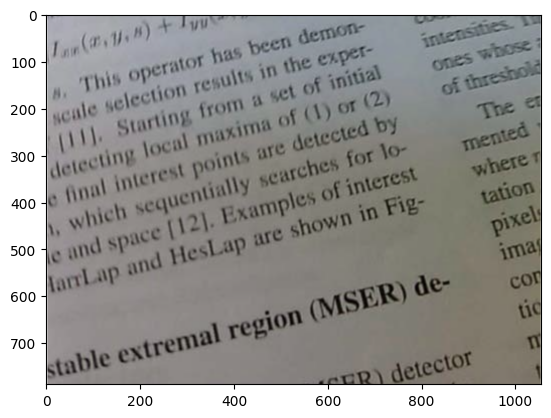

In [2]:
image = cv2.imread('./data/queries/rot.png')
plt.imshow(image)

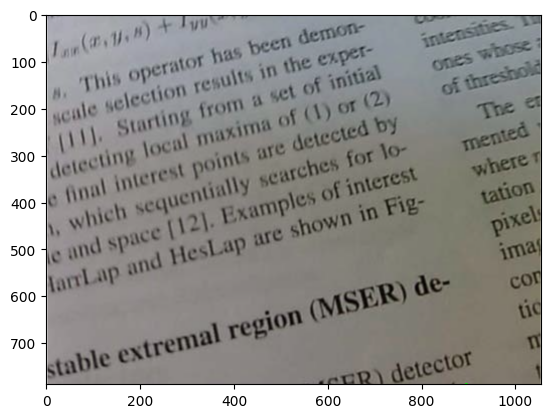

In [3]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,129,4)
contours,hierarchy = cv2.findContours(~thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
output = cv2.drawContours(image,[box],0,(0,255,0),2)
plt.imshow(output)

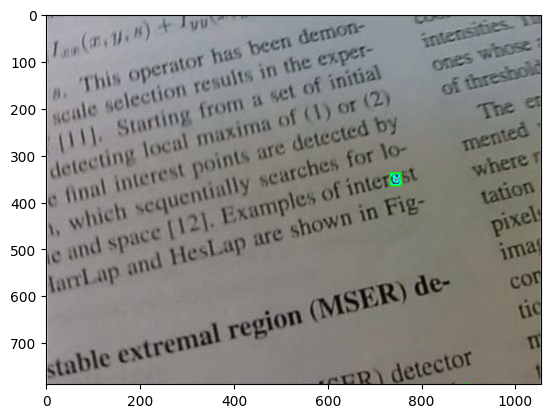

In [4]:
cnt = contours[200]
x, y, w, h = cv2.boundingRect(cnt) 
img = image.copy()
img = cv2.drawContours(img, [cnt], 0, (0, 255, 255), 2) 
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) 
plt.imshow(img) 

In [5]:
len(contours)

505

In [6]:
contours[400]

array([[[146,  35]],

       [[144,  37]],

       [[143,  37]],

       [[142,  38]],

       [[141,  38]],

       [[140,  39]],

       [[140,  40]],

       [[139,  41]],

       [[139,  43]],

       [[138,  44]],

       [[138,  45]],

       [[137,  46]],

       [[137,  47]],

       [[138,  48]],

       [[138,  49]],

       [[139,  49]],

       [[142,  46]],

       [[143,  47]],

       [[143,  54]],

       [[144,  55]],

       [[144,  60]],

       [[143,  61]],

       [[143,  68]],

       [[144,  69]],

       [[147,  69]],

       [[148,  68]],

       [[148,  59]],

       [[149,  58]],

       [[149,  53]],

       [[148,  52]],

       [[148,  50]],

       [[149,  49]],

       [[149,  36]],

       [[148,  36]],

       [[147,  35]]], dtype=int32)

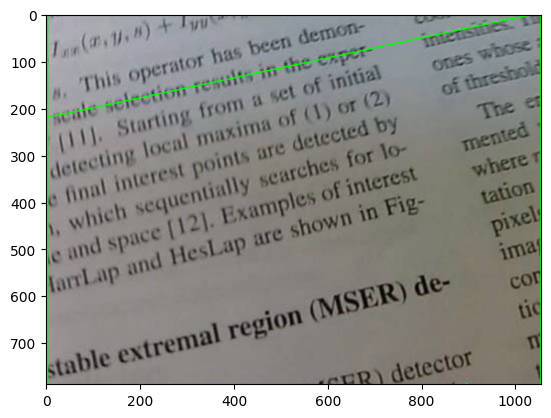

In [7]:
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
output = image.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(output,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(output)

In [34]:
len(lines)

4

In [36]:
lines

array([[[1053.       ,    0.       ]],

       [[   2.       ,    1.5707964]],

       [[   2.       ,    0.       ]],

       [[ 216.       ,    1.3613569]]], dtype=float32)

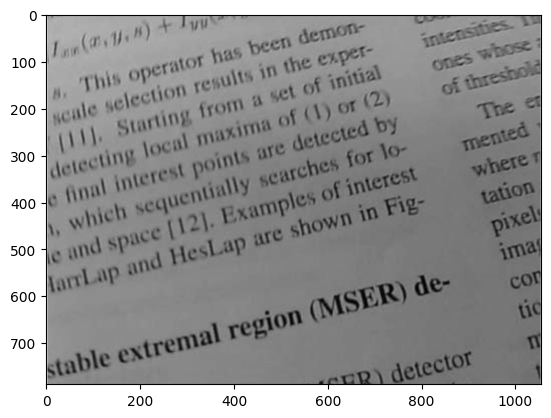

In [29]:
plt.imshow(image,cmap='gray')

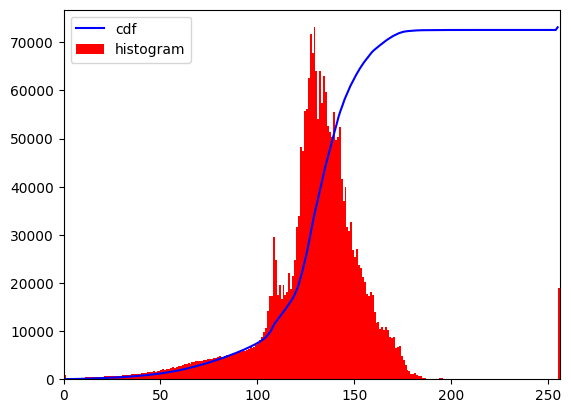

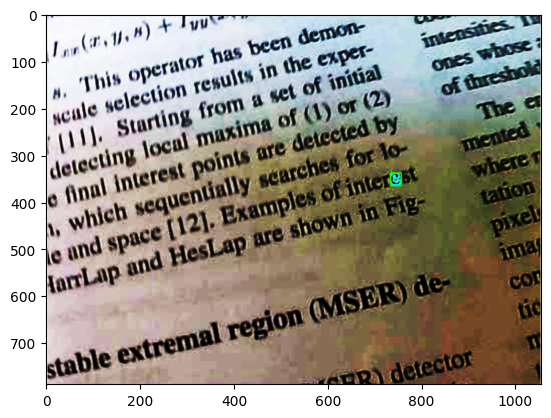

In [27]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.imshow(img2)




In [28]:
equ = cv2.equalizeHist(img)
res = np.hstack((image,equ)) #stacking images side-by-side
plt.imshow(res,cmap='gray')

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


In [20]:
img.dtype

dtype('uint8')

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


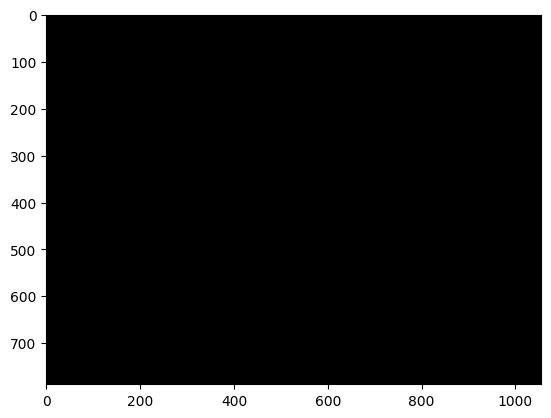

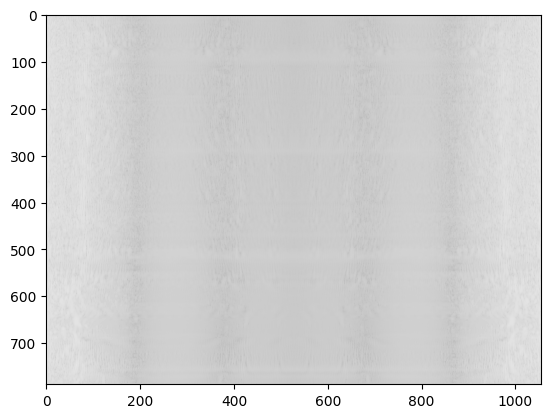

In [32]:
fft = np.fft.fft(image)
magnitude = np.abs(fft)
lm = np.log(magnitude)
plt.imshow(lm,cmap='gray')

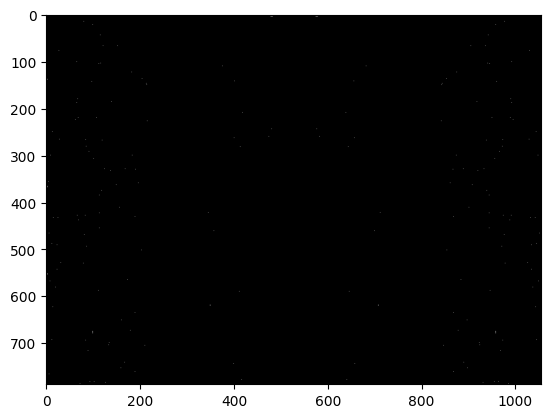

In [34]:
thresh = cv2.adaptiveThreshold(lm.astype('uint8'), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,31,4)
plt.imshow(~thresh,cmap='gray')